In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [16]:
data = np.load("../BAM/hlist_1.00000.npy")
spin = data['spin']
logspin = np.log10(spin)

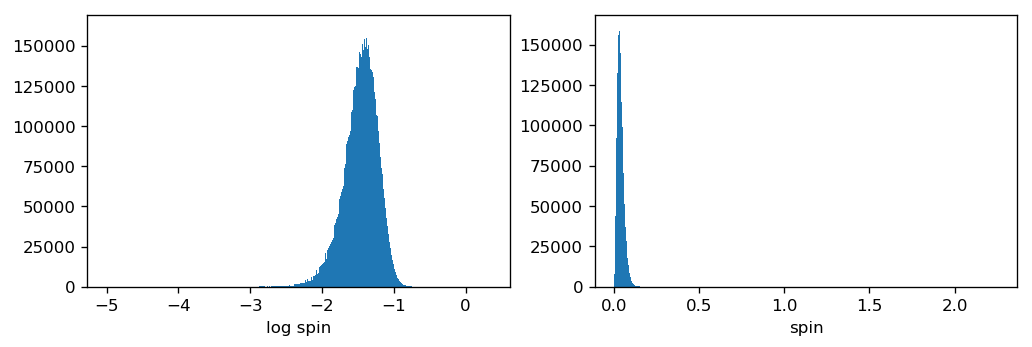

In [18]:
# Plot the original distribution.. in logspace and linspace
plt.figure(dpi=120, figsize=(10, 3))

plt.subplot(121)
plt.hist(spin, bins='auto')
plt.xlabel("log spin")


plt.subplot(122)
plt.hist(10**spin, bins='auto')
plt.xlabel("spin")

plt.show()

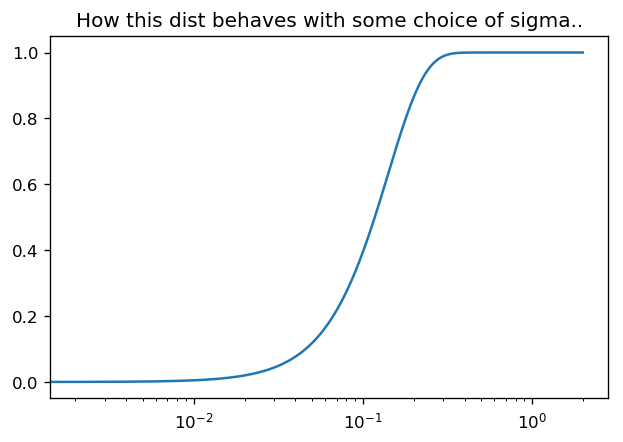

In [70]:
# Probability of 1 means that halo with such spin will be kept
def half_normal_distribution(x, sigma):
    norm = np.sqrt(2/np.pi)/sigma
    return 1 - np.exp(-x**2/(2*sigma**2))

t = np.linspace(0, 2, 1000)
y = half_normal_distribution(t, sigma=0.1)

plt.figure(dpi=120)
plt.semilogx(t, y)
plt.title("How this dist behaves with some choice of sigma..")
plt.show()

In [77]:
sigma = 0.01
rand_arr = np.random.uniform(size=spin.size)
prob_arr = half_normal_distribution(spin, sigma)
IDS = np.where((prob_arr-rand_arr) > 0)

kept_spin = logspin[IDS]

print("Kept {:.3}% halos with sigma = {}".format(IDS[0].size/spin.size*100, sigma))

Kept 93.2% halos with sigma = 0.01


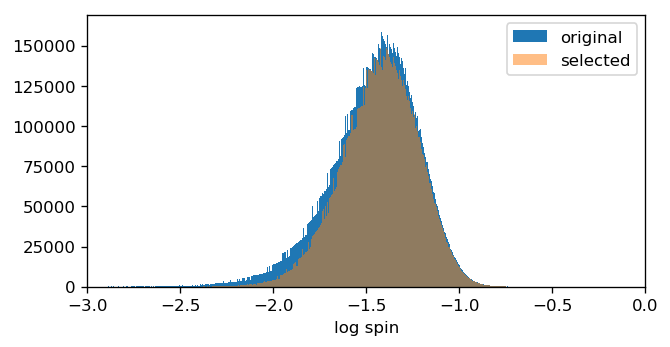

In [78]:
# .. Loads of low spin halos eliminated!

plt.figure(dpi=120, figsize=(6, 3))

plt.hist(logspin, bins='auto', label='original')
plt.hist(kept_spin, bins='auto', label='selected', alpha=0.5)
plt.xlabel("log spin")
plt.legend()
plt.xlim(-3, 0)
plt.show()